In [ ]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def init_spin_lattice(size):
    return np.random.choice([-1,1], size=(size,size))

def init_grid(size):
    return np.meshgrid(range(size), range(size))

In [3]:
def calculate_magnetization(lattice):
    magnetization = 0
    size = len(lattice)
    magnetization = sum(lattice.flatten())/(size*size)
    return magnetization

In [4]:
def calculate_energies(lattice, J):
    energy = 0
    size = len(lattice)
    for row in range(size):
        for col in range(size):
            neighbour_sum = lattice[row, (col+1)%size] + lattice[row, (col-1)%size] \
                    + lattice[(row+1)%size, col] + lattice[(col-1)%size, col]
            energy += -J * lattice[row, col] * neighbour_sum
    return energy/size**2
    

In [5]:
def calculate_susceptibility(magnetizations, temperature, k):
    mean_mag = np.mean(magnetizations)
    mean_mag_square = np.mean(np.square(magnetizations))
    susceptibility = (1 / (k * temperature)) * \
                        (mean_mag_square - np.abs(mean_mag)**2)
    return susceptibility

In [6]:
def calculate_specific_heat(energies, temperature, k):
    mean_energy = np.mean(energies)
    mean_energy_square = np.mean(np.square(energies))
    specific_heat = (1 / (k * temperature**2)) * \
                (mean_energy_square - mean_energy**2)
    return specific_heat

In [12]:
def metropolis_update(lattice, temperature, J, k):
    size = len(lattice)
    row, col = np.random.randint(size, size=2)
    spin = lattice[row, col]
    neighbour_sum = lattice[row, (col+1)%size] + lattice[row, (col-1)%size] \
                    + lattice[(row+1)%size, col] + lattice[(col-1)%size, col]
    e_flip = 2 * J * spin * neighbour_sum
    
    if e_flip <= 0 or np.random.rand() < np.exp(-e_flip/(k * temperature)):
        lattice[row][col] = -spin        

In [17]:
def ising_simulation(size, temperature, n_steps, J=1, k=1):
    lattice = init_spin_lattice(size)
    lattice_snapshots = []
    magnetizations = []
    energies = []
    
    for step in range(n_steps):
        metropolis_update(lattice, temperature, J, k)
        if step % 100 == 0:
            magnetizations.append(calculate_magnetization(lattice))
            energies.append(calculate_energies(lattice, J))
            lattice_snapshots.append(lattice.copy())
                
    return lattice_snapshots, magnetizations, energies

In [23]:
def change_simulation_temps(size, temps, n_steps, j=1, k=1):
    final_magnetizations = []
    final_energies = []
    susceptibilities = []
    specific_heats = []
    for temperature in tqdm(temps):
        _, magnetizations, energies = ising_simulation(size, temperature, n_steps, j, k)
        final_magnetizations.append(magnetizations[-1])
        final_energies.append(energies[-1])
        susceptibilities.append(calculate_susceptibility(magnetizations, temperature, k))
        specific_heats.append(calculate_specific_heat(energies, temperature, k))
    return final_magnetizations, final_energies, susceptibilities, specific_heats


In [37]:
# Simulation parameters
size = 16  # Size of the lattice
temp = 1.5  # Temperature of the system
n_steps = 10000  # Number of Monte Carlo steps
J = 1  # Interaction strength
k = 1

In [38]:
# Run the simulation
lattice_snapshots, magnetizations, energies = ising_simulation(size, temp, n_steps)


In [53]:
temps = np.arange(0.1, 5, 0.01)
len(temps)

490

In [54]:
final_magnetizations, final_energies, susceptibilities, specific_heats = change_simulation_temps(size, temps, n_steps)

100%|█████████████████████████████████████████| 490/490 [00:49<00:00,  9.97it/s]


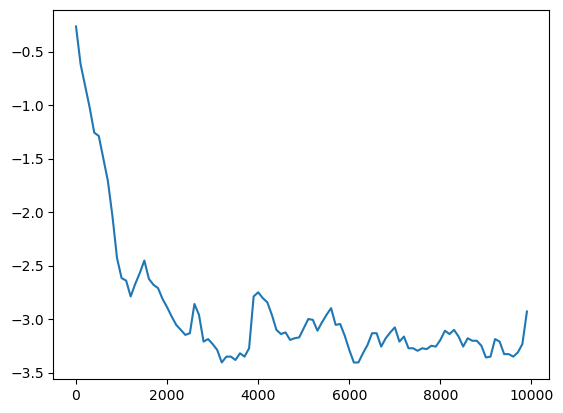

In [55]:
plt.plot(range(0, n_steps, 100), energies)
plt.show()

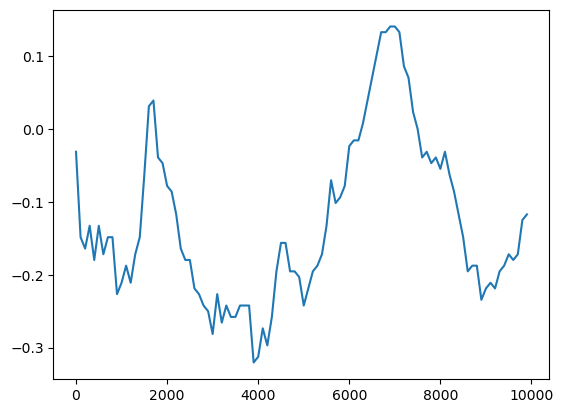

In [56]:
plt.plot(range(0, n_steps, 100), magnetizations)
plt.show()

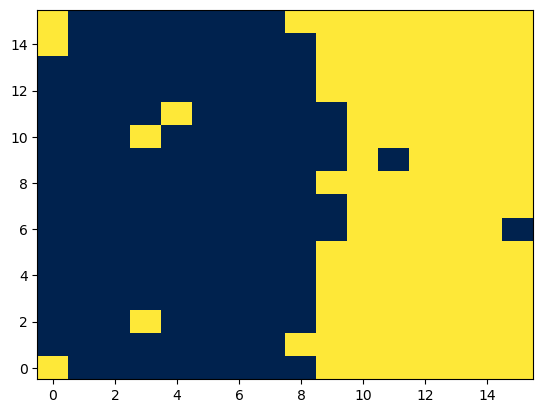

In [57]:
grid = init_grid(size)

plt.pcolormesh(grid[0], grid[1], lattice_snapshots[-1], cmap="cividis")

plt.show()

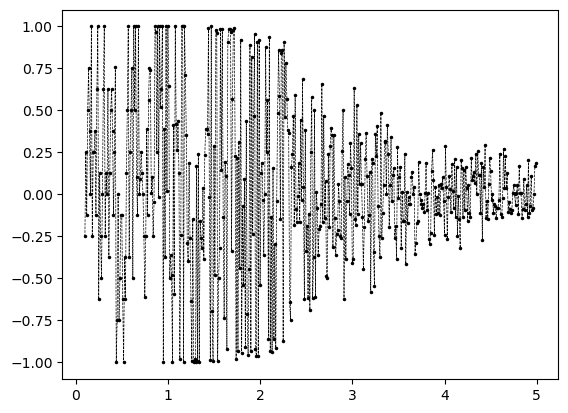

In [64]:
plt.plot(temps, final_magnetizations, "k.--", linewidth=0.5, markersize=3)
plt.show()

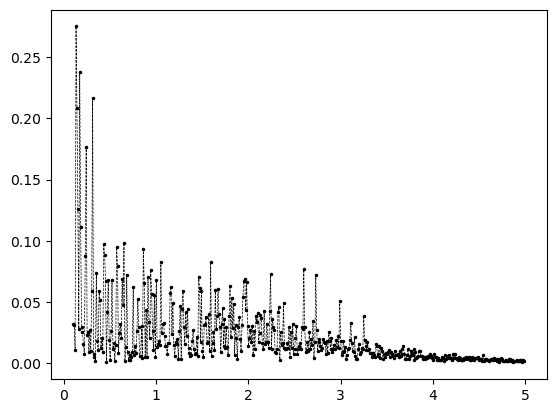

In [65]:
plt.plot(temps, susceptibilities, "k.--", linewidth=0.5, markersize=3)
plt.show()

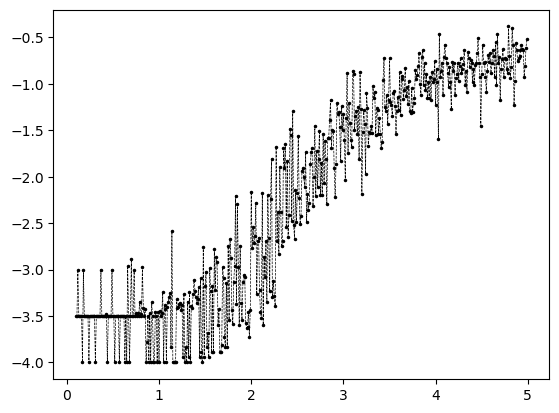

In [66]:
plt.plot(temps, final_energies, "k.--", linewidth=0.5, markersize=3)
plt.show()

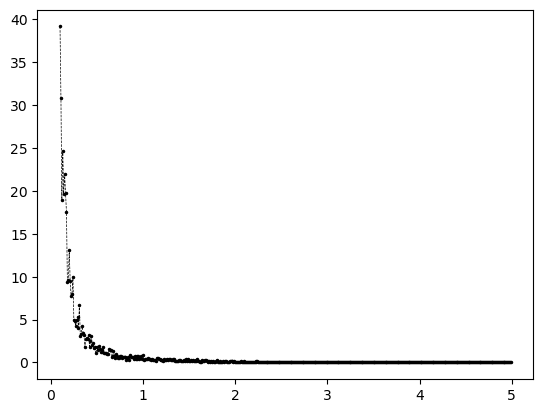

In [67]:
plt.plot(temps, specific_heats, "k.--", linewidth=0.5, markersize=3)
plt.show()